<a href="https://colab.research.google.com/github/geonextgis/Mastering-Machine-Learning-and-GEE-for-Earth-Science/blob/main/04_Machine_Learning_Algorithms/00_Simple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Simple Linear Regression**

Simple linear regression is a statistical method used to model the relationship between two variables, typically denoted as X and Y. It is a straightforward approach to understanding how changes in one variable (X) are associated with changes in another variable (Y). The goal of simple linear regression is to find a linear equation that best represents this relationship.

<center><img src="https://miro.medium.com/v2/resize:fit:1400/1*GSAcN9G7stUJQbuOhu0HEg.png" width="50%"></center>

<center><img src="https://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704-EP713_MultivariableMethods/SimpleLinearRegression.png" width="60%"></center>

## **Import Required Libraries**

In [14]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

## **Read the Data**

In [16]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/GitHub Repo/Mastering-Machine-Learning-and-GEE-for-Earth-Science/Datasets/Placement_SLR.csv")
df

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


## **Plot the Data**

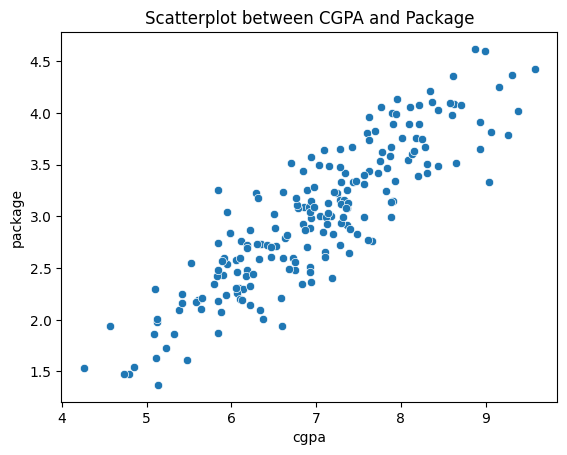

In [17]:
sns.scatterplot(x=df["cgpa"], y=df["package"])
plt.title("Scatterplot between CGPA and Package")
plt.show()

## **Train Test Split**

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df["cgpa"],
                                                    df["package"],
                                                    test_size=0.3,
                                                    random_state=0)
X_train.shape, X_test.shape

((140,), (60,))

## **Train a Simple Linear Regression Model**

In [19]:
# Instantiate a LinearRegression object
lr = LinearRegression()

# Fit the training data
lr.fit(X_train.values.reshape(140, 1), y_train)

LinearRegression()

In [20]:
# Predict the Test data
y_pred = lr.predict(X_test.values.reshape(60, 1))
y_pred

array([2.98741886, 2.56299265, 2.62783555, 3.4295295 , 3.07584099,
       2.36256917, 3.54742567, 2.47457053, 4.16638056, 3.24089563,
       2.12677683, 3.2173164 , 2.54530823, 3.06994618, 3.39416065,
       2.8754175 , 2.63962516, 2.83415384, 2.37435878, 2.93436559,
       3.18784235, 2.33898993, 3.53563605, 4.03079997, 2.20340934,
       1.9027741 , 3.10531503, 2.61604593, 1.91456372, 1.8968793 ,
       2.92847078, 3.73016473, 2.61015112, 2.09140798, 2.51583419,
       3.67711146, 3.19373716, 2.98741886, 3.87164014, 2.50993938,
       3.14068389, 1.90866891, 3.79500763, 2.98741886, 3.99543112,
       4.29606635, 2.48636014, 3.00510329, 3.25858005, 1.75540389,
       3.29984371, 2.46867572, 3.54153086, 2.42151725, 3.7773232 ,
       2.74573172, 3.23500082, 3.09942023, 4.42575213, 2.33898993])

## **Plot the Best Fit Line**

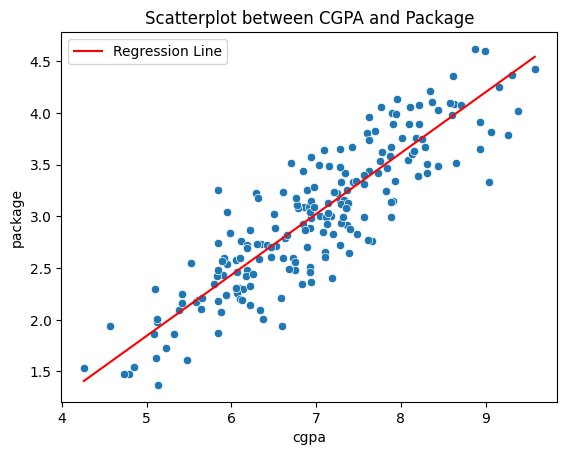

In [21]:
sns.scatterplot(x=df["cgpa"], y=df["package"])
sns.lineplot(x=X_train, y=lr.predict(X_train.values.reshape(140, 1)), c="red",
             label="Regression Line")
plt.title("Scatterplot between CGPA and Package")
plt.show()

## **Fetch the Slope and Y-intercept Value**

In [22]:
# Extract the slope value
m = lr.coef_[0]
# Extract the y-intercept value
c = lr.intercept_

print("Slope (m):", m)
print("Y-intercept (c):", c)

Slope (m): 0.5894808483026013
Y-intercept (c): -1.1035782225186654


## **Check the RMSE**

In [23]:
# Calculate the Root Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse.round(2))
print("Root Mean Squared Error (RMSE):", rmse.round(2))

Mean Squared Error (MSE): 0.1
Root Mean Squared Error (RMSE): 0.32
